# signSGD vs. SGD for a problem with sparse noise

### First we set up the objective function and stochastic gradient
- the objective function is a high dimensional quadratic
- the stochastic gradient is just the true gradient but with large noise added to the first component

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

d = 100

def objective_function(x):
    return 0.5 * np.dot(x,x)

def stochastic_gradient(x):
    noise = np.zeros(d)
    noise[0] = np.random.normal()*100
    return x + noise

### Now we set up the training loop
- the learning rate was tuned separately for each algorithm
- you may also wish to experiment with 1/np.sqrt(step+1) learning rate schedules. We did this, and after re-tuning learning rates it does not change the qualitative conclusion

In [2]:
def train(alg, lr, N_steps, repeats):
    runs = np.zeros([N_steps,repeats])
    for rep in range(repeats):
        x = np.random.normal(size=d)
        f_values = []
        for step in range(N_steps):
            f_values.append(objective_function(x))
            if alg == 'sgd':
                update = stochastic_gradient(x)
            elif alg == 'signSGD':
                update = np.sign(stochastic_gradient(x))
            x -= lr * update
#             x -= lr/np.sqrt(step+1) * update
        runs[:,rep] = np.asarray(f_values)
    return runs

N_steps = 10000
repeats = 10

sgd_runs = train('sgd', lr=0.001, N_steps=N_steps, repeats=repeats)
signSGD_runs = train('signSGD', lr=0.01, N_steps=N_steps, repeats=repeats)

## next two lines give initial learning rates tuned for 1/np.sqrt(step+1) learning rate schedules.
# sgd_runs = train('sgd', lr=0.01, N_steps=N_steps, repeats=repeats)
# signSGD_runs = train('signSGD', lr=0.1, N_steps=N_steps, repeats=repeats)

### Now we plot results, averaged over the repeats and with error bars

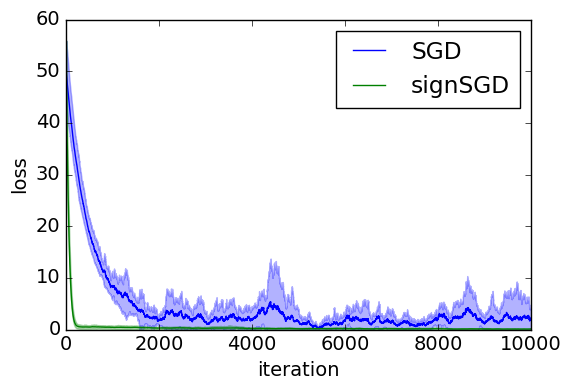

In [3]:
def processRuns(runs):
    mean = np.mean(runs,axis=1)
    std = np.std(runs,axis=1)
    return mean, std

sgd_mean, sgd_var = processRuns(sgd_runs)
sign_mean, sign_var = processRuns(signSGD_runs) 

plt.plot(sgd_mean)
plt.fill_between(range(N_steps),sgd_mean - sgd_var, sgd_mean+sgd_var,alpha=0.3, edgecolor='blue', facecolor='blue')
plt.plot(sign_mean)
plt.fill_between(range(N_steps),sign_mean - sign_var, sign_mean+sign_var,alpha=0.3, edgecolor='green', facecolor='green')
plt.legend(["SGD", "signSGD"])
plt.ylim([0,60])
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()